### <font color='blue'>  <h1><center>TP3 Data Mining </center></h1> </font> 

>> ## <font color='gray'>  Exercice 1 : </font> 

In [386]:
import pandas as pd


In [387]:
abdellatif_thabet = pd.read_csv('grav.csv')

In [388]:
abdellatif_thabet.head()

,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [389]:
#inputs
X = abdellatif_thabet['height']
y = abdellatif_thabet['seconds squared']

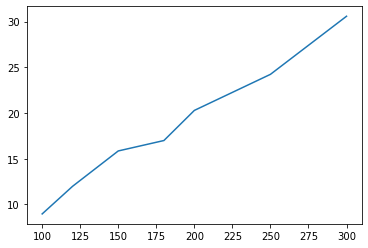

In [390]:
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.show()

### <span style='background:pink'> from the plot we can notice that the two variables have a hidh correlation </span>

In [391]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [392]:
print('the correlation value: {}'.format(r_value))

the correlation value: 0.9947324344135698


In [393]:
print('the interception :{}'.format(intercept))

the interception :-0.6801232361241745


In [394]:
print('the slope :{}'.format(slope))

the slope :0.10280912511759172


In [395]:
std_err

0.004737919558962453

### <span style='background:yellow'>we can use statsmodels module instead which will give a summary of all parameters of a model </span>

In [396]:
import statsmodels.api as sm


In [397]:
#here we fit the data to the model
model = sm.OLS(y,X).fit()

In [398]:
model.summary()

/home/abdou/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        seconds squared   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              4287.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):                    8.54e-10
Time:                        04:22:43   Log-Likelihood:                         -7.7673
No. Observations:                   7   AIC:                                      17.53
Df Residuals:                       6   BIC:                                      17.48
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.0996      0.002     65.472      0.000       0.096       0.103
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.625
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.763
Skew:                          -0.005   Prob(JB):                        0.683
Kurtosis:                       1.382   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>> ## <font color='gray'>  Exercice 2 : </font> 

In [399]:
import pyreadstat
df, metadata = pyreadstat.read_sav("test_scores.sav")


In [400]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0


In [401]:
df.shape

(2133, 11)

In [402]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['pretest'],df['posttest'])

In [403]:
print('the correlation coefficient between pretest and posttest is :{:.3f}'.format(r_value))

the correlation coefficient between pretest and posttest is :0.951


#### intuitivey  we need to remove some irrelevant feauture from the inputs 


In [404]:
df =df.drop(['classroom','school','student_id'],axis = 1)

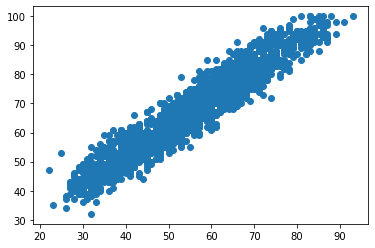

In [405]:
plt.scatter(df['pretest'],df['posttest'])
plt.show()

### <span style='background:yellow'>We notice that the two variables are highly correlated which will give a good accuracy for teh lienar regression model but we first we need to take a look at the other features correlations throw a heatmap </span>

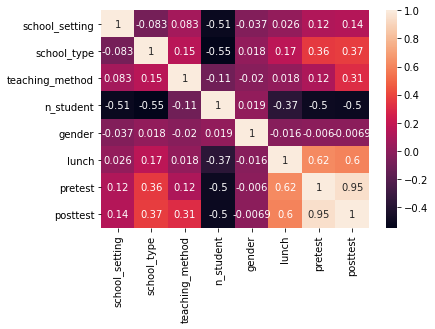

In [406]:
### heatmap
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

#### as we can see from the heatmap there is not a single correlation which is equal or even come close to the pretest,posttest correlation, but we'll only remove gender and school_setting features which have realy low correlations with the output variable and therefore dropping them will not affect our model performance

In [407]:
df =df.drop(['gender','school_setting'],axis = 1)

In [408]:
df.isna().sum()

school_type        0
teaching_method    0
n_student          0
lunch              0
pretest            0
posttest           0
dtype: int64

### <span style='background:yellow'>there is no missing values in the dataframe so we can take a step further and split it into two dataframes : y contains the utput variable and X contains all other input variables  </span>

In [409]:
y = df[['posttest']]
X = df.drop('posttest',axis = 1)


In [410]:
X.head()

,school_type,teaching_method,n_student,lunch,pretest
0,2.0,0.0,20.0,2.0,62.0
1,2.0,0.0,20.0,2.0,66.0
2,2.0,0.0,20.0,2.0,64.0
3,2.0,0.0,20.0,2.0,61.0
4,2.0,0.0,20.0,2.0,64.0


In [411]:
from sklearn.model_selection import train_test_split

#### to test our model performance the standard practisd is to split the dataset into 2 partitions one for training the model and the other for the test

In [412]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [413]:
### here we'er going to use linear Regression model

In [414]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [415]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [416]:
y_pred_train = model.predict(X_train)

print('train accuracy: %.2f'
      % r2_score(y_train, y_pred_train))

train accuracy: 0.95


In [417]:
y_pred_test = model.predict(X_test)

print('test accuracy: %.2f'
      % r2_score(y_test, y_pred_test))

test accuracy: 0.95


In [418]:
### the linear regression model accuracy increase as the correlation coefficient increase

>> ## <font color='gray'>  Exercice 3 : </font> 

In [419]:
data = pd.read_csv('housing.data.txt', sep=",")
data.columns = ["CIRM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]


In [420]:
data.head()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [421]:
y = data[['MEDV']]
X = data.drop('MEDV',axis = 1)

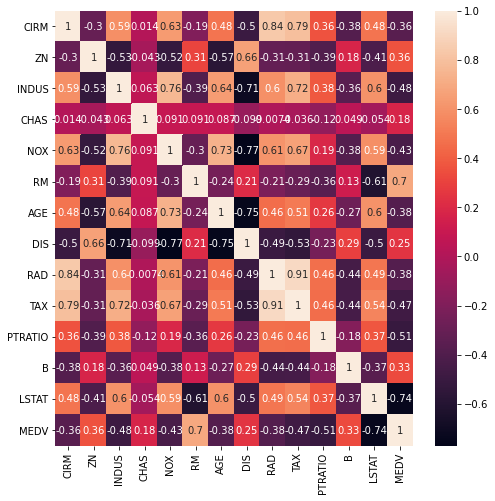

In [422]:
### To see the significatn variables we'll see the their correlations with the output 
fig, ax = plt.subplots(figsize=(8,8))        
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

### from the heatmap RM,LSTAT are the two features which have signicant correlations with the target

In [423]:
#result = sm.OLS(y,X).fit()
#print ("the r_squared : "+str(result.rsquared)+" and the adjusted r_squared is "+str(result.rsquared_adj))


In [424]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [425]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [426]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy: ", scores.mean())

Accuracy:  0.7095460581954312


In [427]:
print(scores)

[0.76293573 0.53332875 0.71438552 0.75685011 0.78023019]


In [428]:
y_pred_test = model.predict(X_test)

print('test accuracy: %.2f'
      % r2_score(y_test, y_pred_test))

test accuracy: 0.68


### The model is suitable because it has good performance on both train and  test data